In [1]:
!kaggle datasets download -d mrigaankjaswal/exercise-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/mrigaankjaswal/exercise-detection-dataset
License(s): CC0-1.0
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 41.7MB/s]


In [2]:
!unzip "/content/exercise-detection-dataset.zip" -d "/content/"

Archive:  /content/exercise-detection-dataset.zip
  inflating: /content/exercise_angles.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/exercise_angles.csv")

In [6]:
copy_df = df.copy()

In [7]:
# df = copy_df.copy()

In [8]:
df.head()

,Side,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,left,10.639208,174.466813,174.785143,179.848140,179.419276,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
1,left,10.590342,174.428706,174.765042,179.775215,179.386147,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
2,left,10.546746,174.489431,174.785790,179.660017,179.333710,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
3,left,10.487682,174.614913,174.759542,179.614223,179.313926,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
4,left,10.412107,174.758503,174.737721,179.570564,179.298805,90.0,90.0,90.0,90.0,90.0,Jumping Jacks


### **About the dataset**
- **Shoulder_Angle**: The angle between the upper arm and the torso.
- **Elbow_Angle**: The angle between the upper arm and forearm.
- **Hip_Angle**: The angle between the torso and the upper leg.
- **Knee_Angle**: The angle between the upper leg and the lower leg.
- **Ankle_Angle**: The angle between the lower leg and the foot.
- **Shoulder_Ground_Angle**: The angle between the shoulder and the ground plane.
- **Elbow_Ground_Angle**: The angle between the elbow and the ground plane.
- **Hip_Ground_Angle**: The angle between the hip and the ground plane.
- **Knee_Ground_Angle**: The angle between the knee and the ground plane.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31033 entries, 0 to 31032
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Side                   31033 non-null  object 
 1   Shoulder_Angle         31033 non-null  float64
 2   Elbow_Angle            31033 non-null  float64
 3   Hip_Angle              31033 non-null  float64
 4   Knee_Angle             31033 non-null  float64
 5   Ankle_Angle            31033 non-null  float64
 6   Shoulder_Ground_Angle  31033 non-null  float64
 7   Elbow_Ground_Angle     31033 non-null  float64
 8   Hip_Ground_Angle       31033 non-null  float64
 9   Knee_Ground_Angle      31033 non-null  float64
 10  Ankle_Ground_Angle     31033 non-null  float64
 11  Label                  31033 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.8+ MB


In [10]:
df.columns

Index(['Side', 'Shoulder_Angle', 'Elbow_Angle', 'Hip_Angle', 'Knee_Angle',
       'Ankle_Angle', 'Shoulder_Ground_Angle', 'Elbow_Ground_Angle',
       'Hip_Ground_Angle', 'Knee_Ground_Angle', 'Ankle_Ground_Angle', 'Label'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Side,0
Shoulder_Angle,0
Elbow_Angle,0
Hip_Angle,0
Knee_Angle,0
Ankle_Angle,0
Shoulder_Ground_Angle,0
Elbow_Ground_Angle,0
Hip_Ground_Angle,0
Knee_Ground_Angle,0


In [13]:
df["Label"].value_counts()

,count
Label,
Push Ups,9764
Pull ups,6659
Jumping Jacks,5209
Squats,4997
Russian twists,4404


In [14]:
(df["Label"].value_counts())/(df["Label"].value_counts().sum())

,count
Label,
Push Ups,0.314633
Pull ups,0.214578
Jumping Jacks,0.167854
Squats,0.161022
Russian twists,0.141913


* There is a slight imbalance in the dataset.

In [15]:
df["Side"].value_counts()

,count
Side,
left,31033


* We can remove this column since `Side` only contains the value 'left'.

In [16]:
df.drop(columns = "Side", inplace = True)

In [17]:
df.head()

,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,10.639208,174.466813,174.785143,179.848140,179.419276,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
1,10.590342,174.428706,174.765042,179.775215,179.386147,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
2,10.546746,174.489431,174.785790,179.660017,179.333710,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
3,10.487682,174.614913,174.759542,179.614223,179.313926,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
4,10.412107,174.758503,174.737721,179.570564,179.298805,90.0,90.0,90.0,90.0,90.0,Jumping Jacks


# Univariate Analysis

In [18]:
df.describe()

,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle
count,31033.000000,31033.000000,31033.000000,31033.000000,31033.000000,31033.000000,31033.000000,31033.000000,31033.000000,31033.000000
mean,66.522206,114.303010,137.466151,143.273623,135.211957,88.816743,88.926949,79.408694,75.795121,68.985596
std,60.226756,57.906279,57.048278,48.041715,53.304068,14.546233,13.856550,42.359381,48.530150,57.802208
min,0.002748,0.000974,0.006850,0.116036,0.031297,-90.000000,-90.000000,-90.000000,-90.000000,-90.000000
25%,17.852184,58.900491,111.556724,123.646144,106.740814,90.000000,90.000000,90.000000,90.000000,90.000000
50%,40.585632,132.999090,168.374922,168.227063,162.926184,90.000000,90.000000,90.000000,90.000000,90.000000
75%,121.209005,168.769517,175.656498,177.225089,175.735039,90.000000,90.000000,90.000000,90.000000,90.000000
max,179.991577,179.998861,179.999848,179.999277,179.999942,90.000000,90.000000,90.000000,90.000000,90.000000


In [19]:
colors = ['blue', 'green', 'red', 'purple', 'brown', 'darkorange', 'darkred', 'navy', 'teal', 'black']

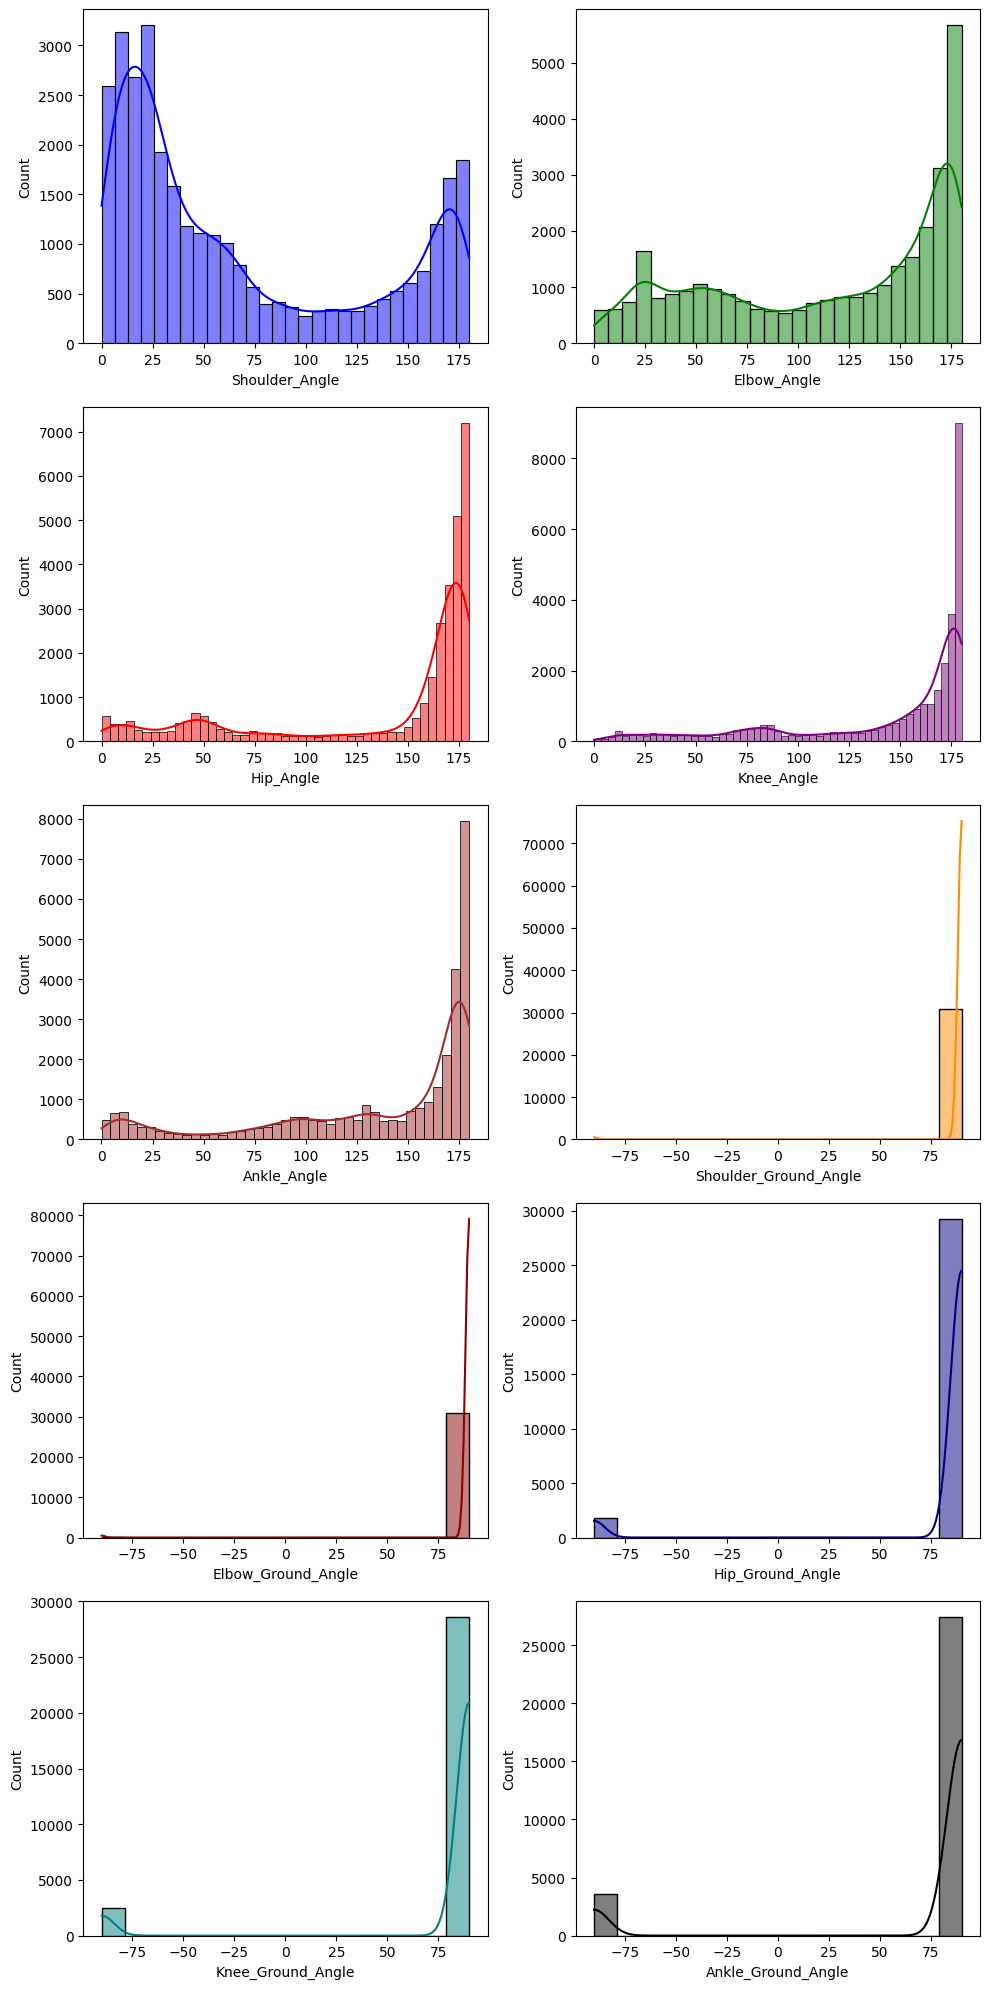

In [20]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
ax = ax.flatten()
for i in range(len(df.columns[:-1])):
  sns.histplot(x = df.iloc[:, i], ax = ax[i], kde = True, color=colors[i % len(colors)])

plt.tight_layout()
plt.show()

* For the `Shoulder_Angle`, `Elbow_Angle`, `Hip_Angle`, `Knee_Angle`, `Ankle_Angle`: These angles seem to show a distribution with many values near the extreme ends, particularly for the `Hip_Angle`, `Knee_Angle`, and `Ankle_Angle`, where there are significant spikes at high angles (close to 175 degrees).
* This could imply that in the dataset, the subjects or entities are often positioned in very specific postures, particularly with joints near full extension.

* For the angles relative to the ground (`Shoulder_Ground_Angle`, `Elbow_Ground_Angle`, etc.), the values are highly concentrated at one end of the spectrum, particularly around 75 degrees.
* This suggests that in the dataset, the subjects have limbs consistently at a specific orientation relative to the ground, which may point to uniform body posture or movement patterns.


* There seems to be an imbalance in the data, especially in the ground angles, where the majority of values are clustered around a few specific angles.
* Ankle, Hip, and Knee Angles show an extreme clustering near high angles, possibly representing subjects frequently extending these joints to their limits.

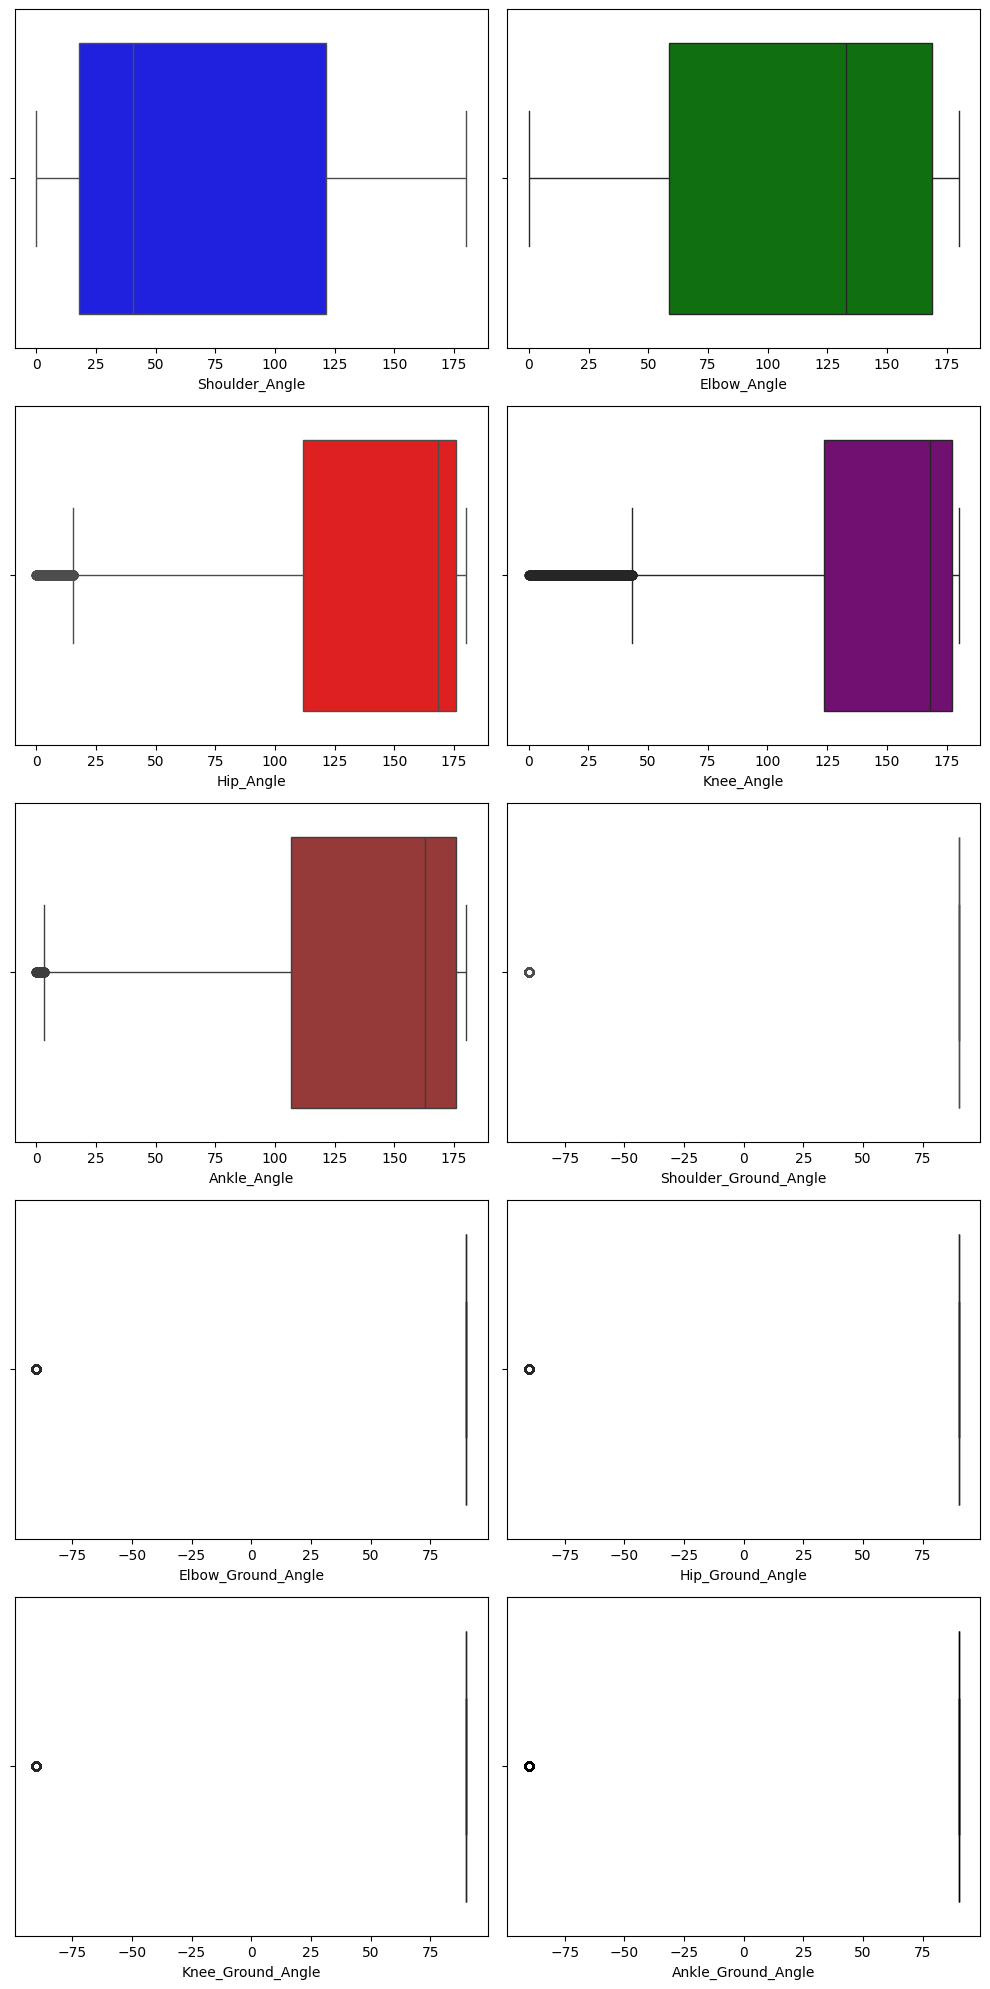

In [21]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
ax = ax.flatten()
for i in range(len(df.columns[:-1])):
  sns.boxplot(x = df.iloc[:, i], ax = ax[i], color=colors[i % len(colors)])

plt.tight_layout()
plt.show()

* `Shoulder_Angle`:
  * The distribution looks quite symmetric and is tightly clustered between 50 and 175 degrees. There are no outliers, and most values are concentrated around the median.
* `Elbow_Angle`:
  * Similar to the `Shoulder_Angle`, the `Elbow_Angle` has a broad distribution between 50 and 175 degrees. Again, no clear outliers.
* `Hip_Angle`:
  * The values of the `Hip_Angle` are more concentrated towards the higher end (above 125 degrees), but we can also observe some outliers below the 25-degree mark. This suggests that most values are high but with a few extreme cases.
* `Knee_Angle`:
  * There is a long tail of values at the lower end of the `Knee_Angle` distribution, with a few significant outliers between 0 and 50 degrees. Most of the `Knee_Angle` values are concentrated between 125 and 175 degrees, indicating that extreme lower angles are rare but present.
* `Ankle_Angle`:
  * The `Ankle_Angle` has a similar distribution to the `Hip_Angle`, with some outliers on the lower end. Most values are concentrated in the upper range (125-175 degrees).
* Ground Angles (`Shoulder_Ground_Angle`, `Elbow_Ground_Angle`, `Hip_Ground_Angle`, `Knee_Ground_Angle`, `Ankle_Ground_Angle`):
  * These angles seem to have very sparse values, with most appearing to be outliers.

<Axes: title={'center': 'Exercises'}, ylabel='count'>

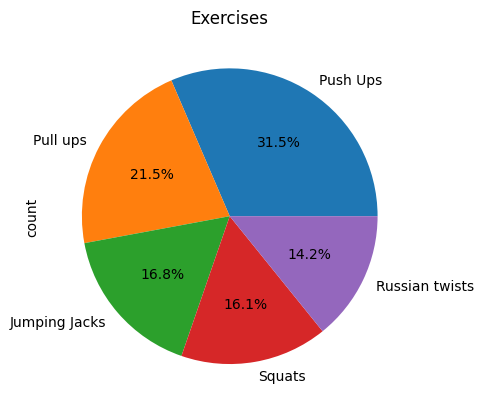

In [22]:
df["Label"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", title = "Exercises")

In [23]:
df["Shoulder_Ground_Angle"].value_counts()

,count
Shoulder_Ground_Angle,
90.0,30829
-90.0,204


In [24]:
df["Elbow_Ground_Angle"].value_counts()

,count
Elbow_Ground_Angle,
90.0,30848
-90.0,185


In [25]:
df["Hip_Ground_Angle"].value_counts()

,count
Hip_Ground_Angle,
90.0,29207
-90.0,1826


In [26]:
df["Knee_Ground_Angle"].value_counts()

,count
Knee_Ground_Angle,
90.0,28584
-90.0,2449


In [27]:
df["Ankle_Ground_Angle"].value_counts()

,count
Ankle_Ground_Angle,
90.0,27410
-90.0,3623




*  `Shoulder_Ground_Angle`, `Elbow_Ground_Angle`, `Hip_Ground_Angle`, `Knee_Ground_Angle`, `Ankle_Ground_Angle` all have unique values of -90 and 90, with -90 considered an outlier.

# Multivariate Analysis

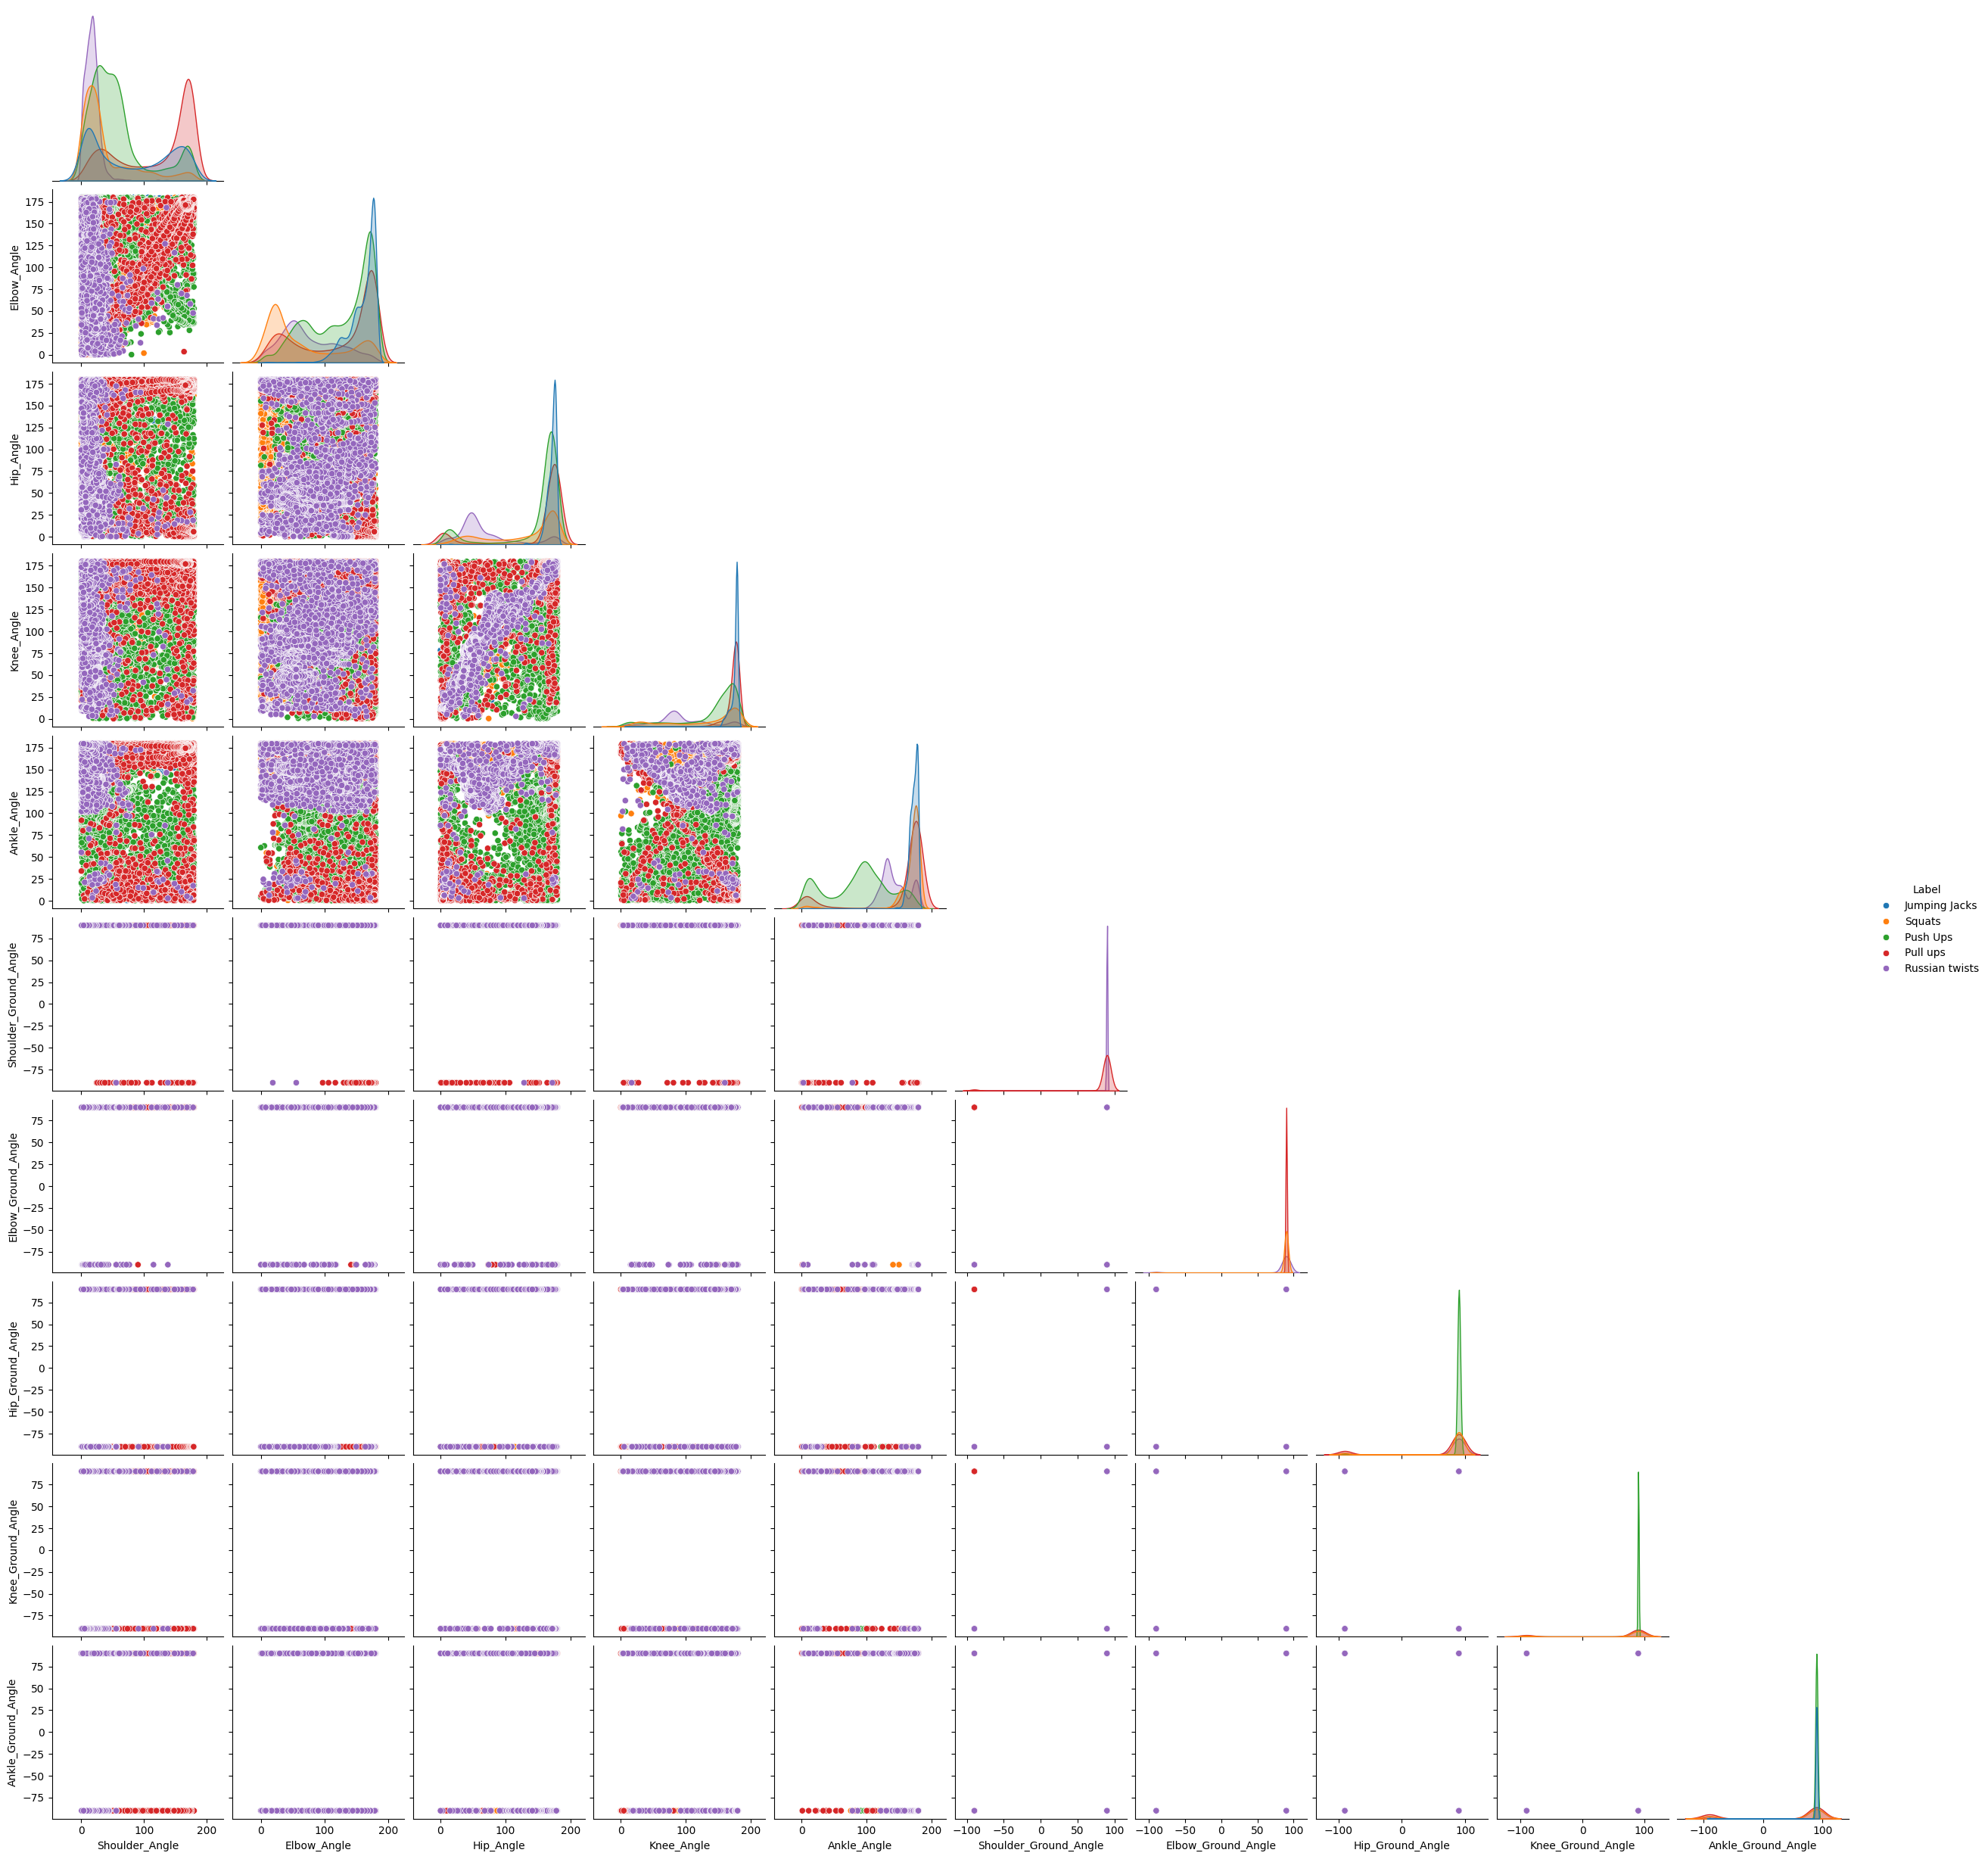

In [28]:
sns.pairplot(df, hue = "Label", corner = True)

* Cluster Separation in Certain Features:
  * Some of the diagonal distributions (such as for "`Elbow_Angle`", "`Hip_Angle`", "`Knee_Angle`", and "`Ankle_Angle`") show distinct separation of classes, especially between labels like **Jumping jacks**, **Push up**, and **Squats**. This indicates that these features may provide useful information for classification.

  * Conversely, some features like the ground angles (e.g., "`Shoulder_Ground_Angle`", "`Elbow_Ground_Angle`", etc.) show poor separation, and the data points are closely bunched, suggesting that these features might not provide much discriminatory power.
* Highly Correlated Features:
  * The strong linear correlations between certain pairs of features are noticeable, especially in upper left plots where we can see clear patterns of aligned points, for example, between "`Elbow_Angle`" and "`Shoulder_Angle`". This correlation may indicate some redundancy in these features, which could be addressed either by removing one of the correlated features or by using dimensionality reduction techniques like PCA (Principal Component Analysis).
* Low Variance Features:
  * Some features like "`Knee_Ground_Angle`" and other ground angles appear to have little variation across all classes. These low-variance features might not contribute much to the predictive power of the model and could be considered for removal.



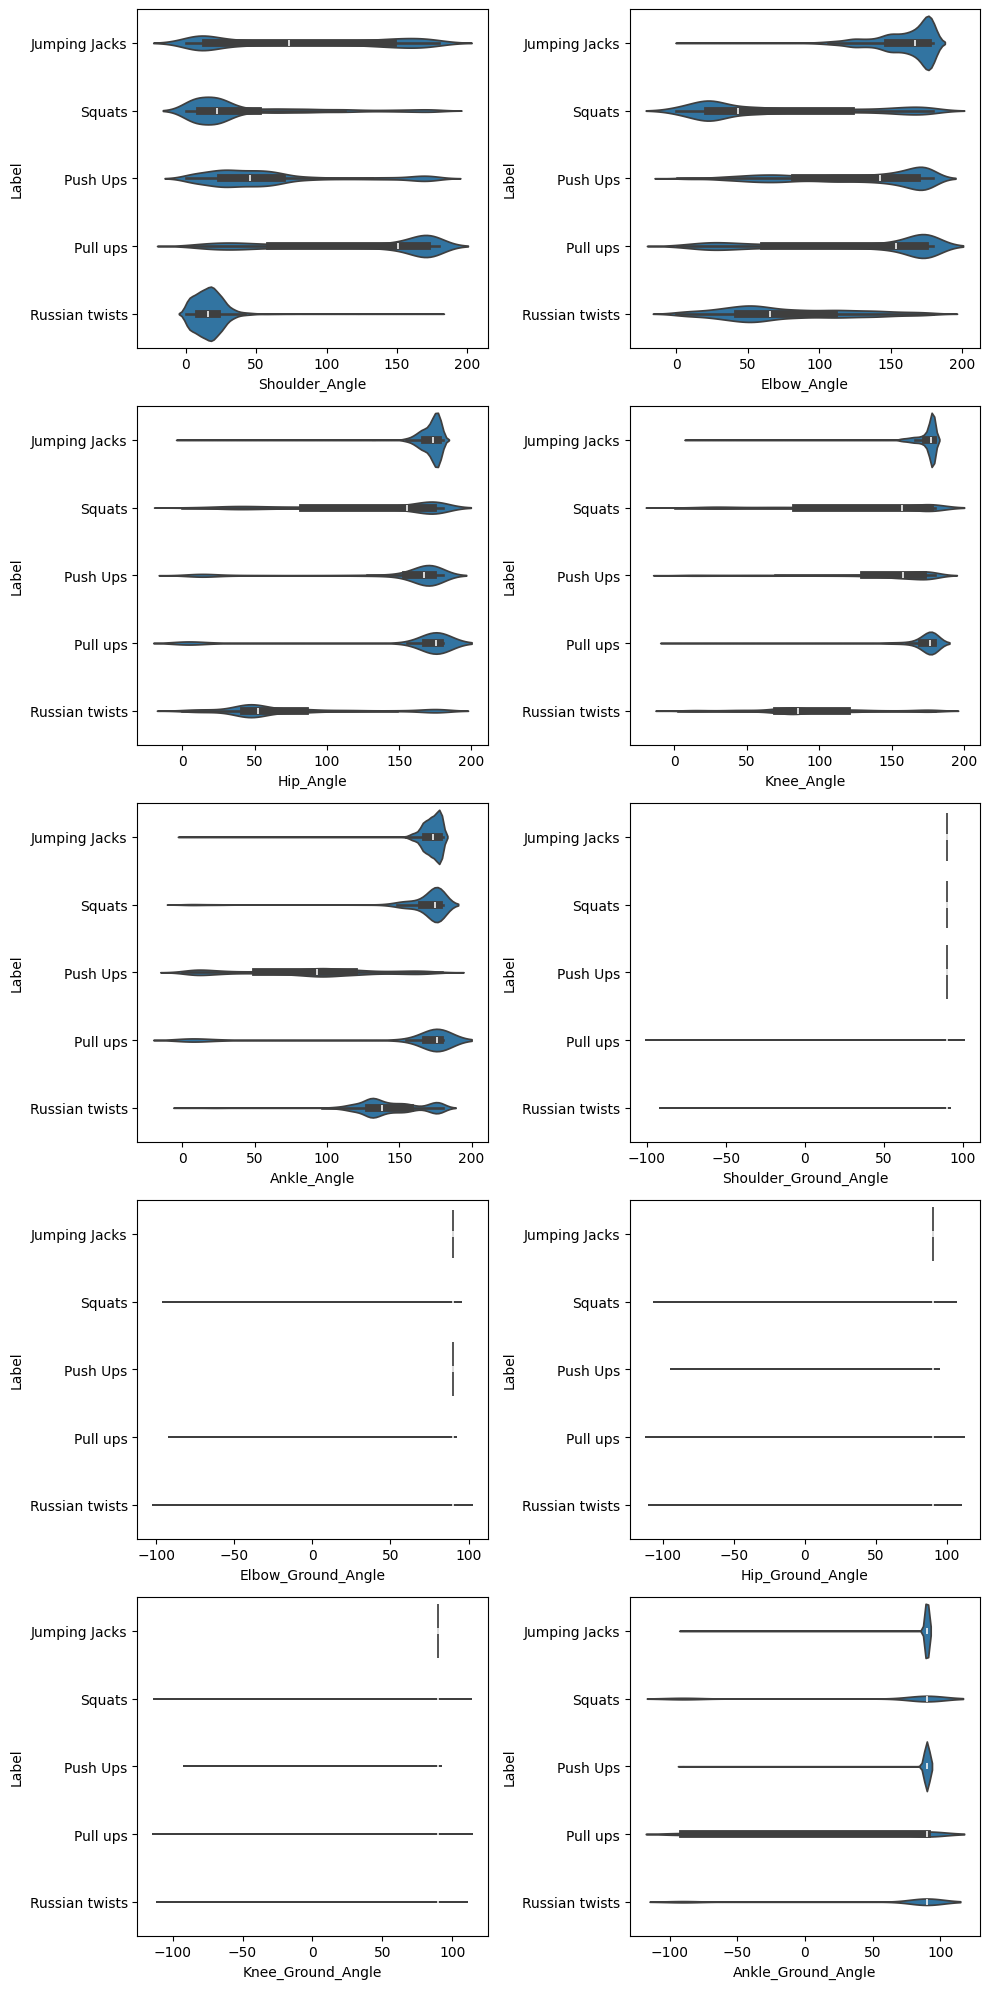

In [29]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
ax = ax.flatten()

k = 0
for i in df.columns[:-1]:
  sns.violinplot(x = i, y = "Label", ax = ax[k], data = df)
  k = k+1

plt.tight_layout()
plt.show()

In [30]:
norm_df = df.copy()

In [31]:
for i in norm_df.columns[:-1]:
  norm_df[i] = np.sin(norm_df[i]*(np.pi/180))

In [32]:
norm_df.head()

,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,0.184624,0.096422,0.090891,0.002650,0.010135,1.0,1.0,1.0,1.0,1.0,Jumping Jacks
1,0.183786,0.097084,0.091240,0.003923,0.010714,1.0,1.0,1.0,1.0,1.0,Jumping Jacks
2,0.183038,0.096029,0.090880,0.005934,0.011629,1.0,1.0,1.0,1.0,1.0,Jumping Jacks
3,0.182024,0.093849,0.091336,0.006733,0.011974,1.0,1.0,1.0,1.0,1.0,Jumping Jacks
4,0.180727,0.091354,0.091715,0.007495,0.012238,1.0,1.0,1.0,1.0,1.0,Jumping Jacks


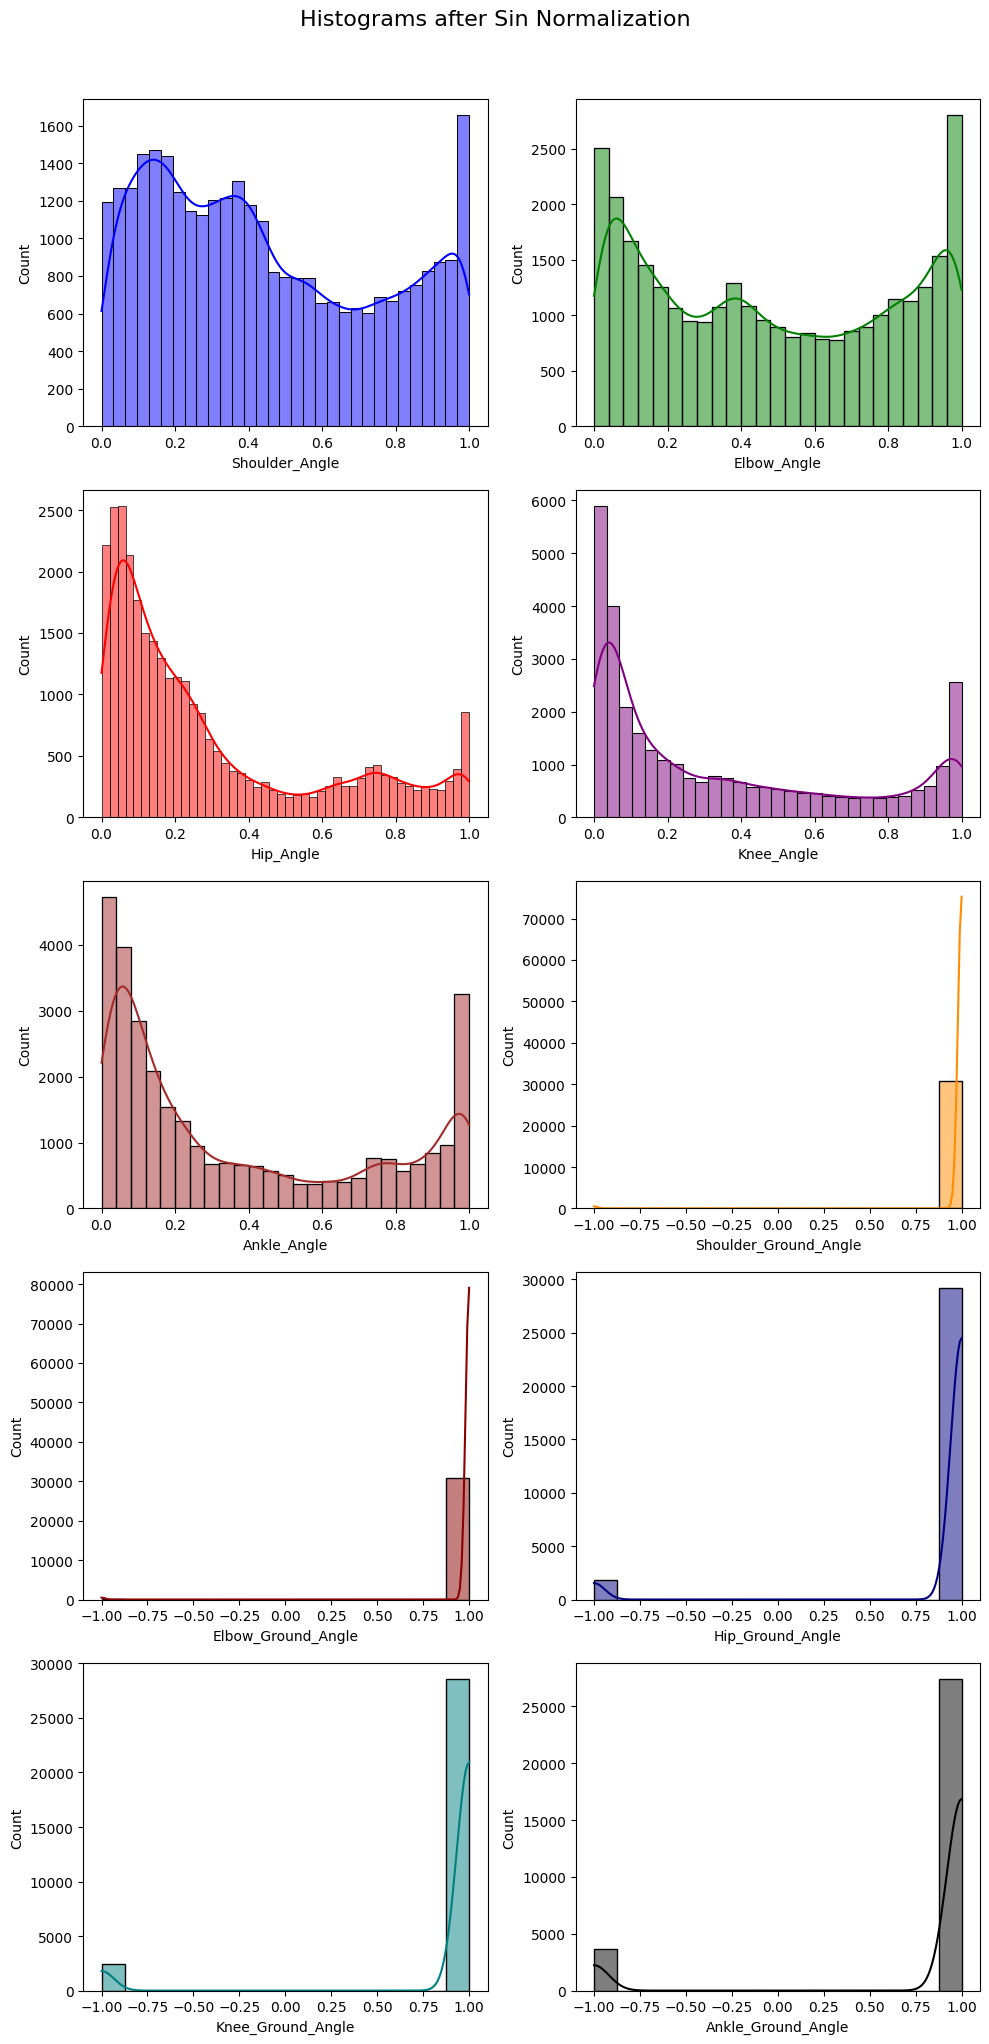

In [33]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
ax = ax.flatten()
for i in range(len(norm_df.columns[:-1])):
  sns.histplot(x = norm_df.iloc[:, i], ax = ax[i], kde = True, color=colors[i % len(colors)])


fig.suptitle('Histograms after Sin Normalization', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

* The transformation has effectively smoothed out some of the sharp peaks and troughs in the distributions, making them more uniform
  * `Shoulder_Angle` and `Elbow_Angle` now appear more uniformly distributed, which is beneficial for many machine learning models.
  * `Hip_Angle` and `Knee_Angle` also show a more balanced spread across their ranges.

* Sin normalization is useful for features that have a cyclical nature (such as angles), as it constrains the values between -1 and 1, reflecting the inherent periodicity. After applying this transformation, the distributions for most features are more symmetric, which can make the features easier to interpret for certain models.

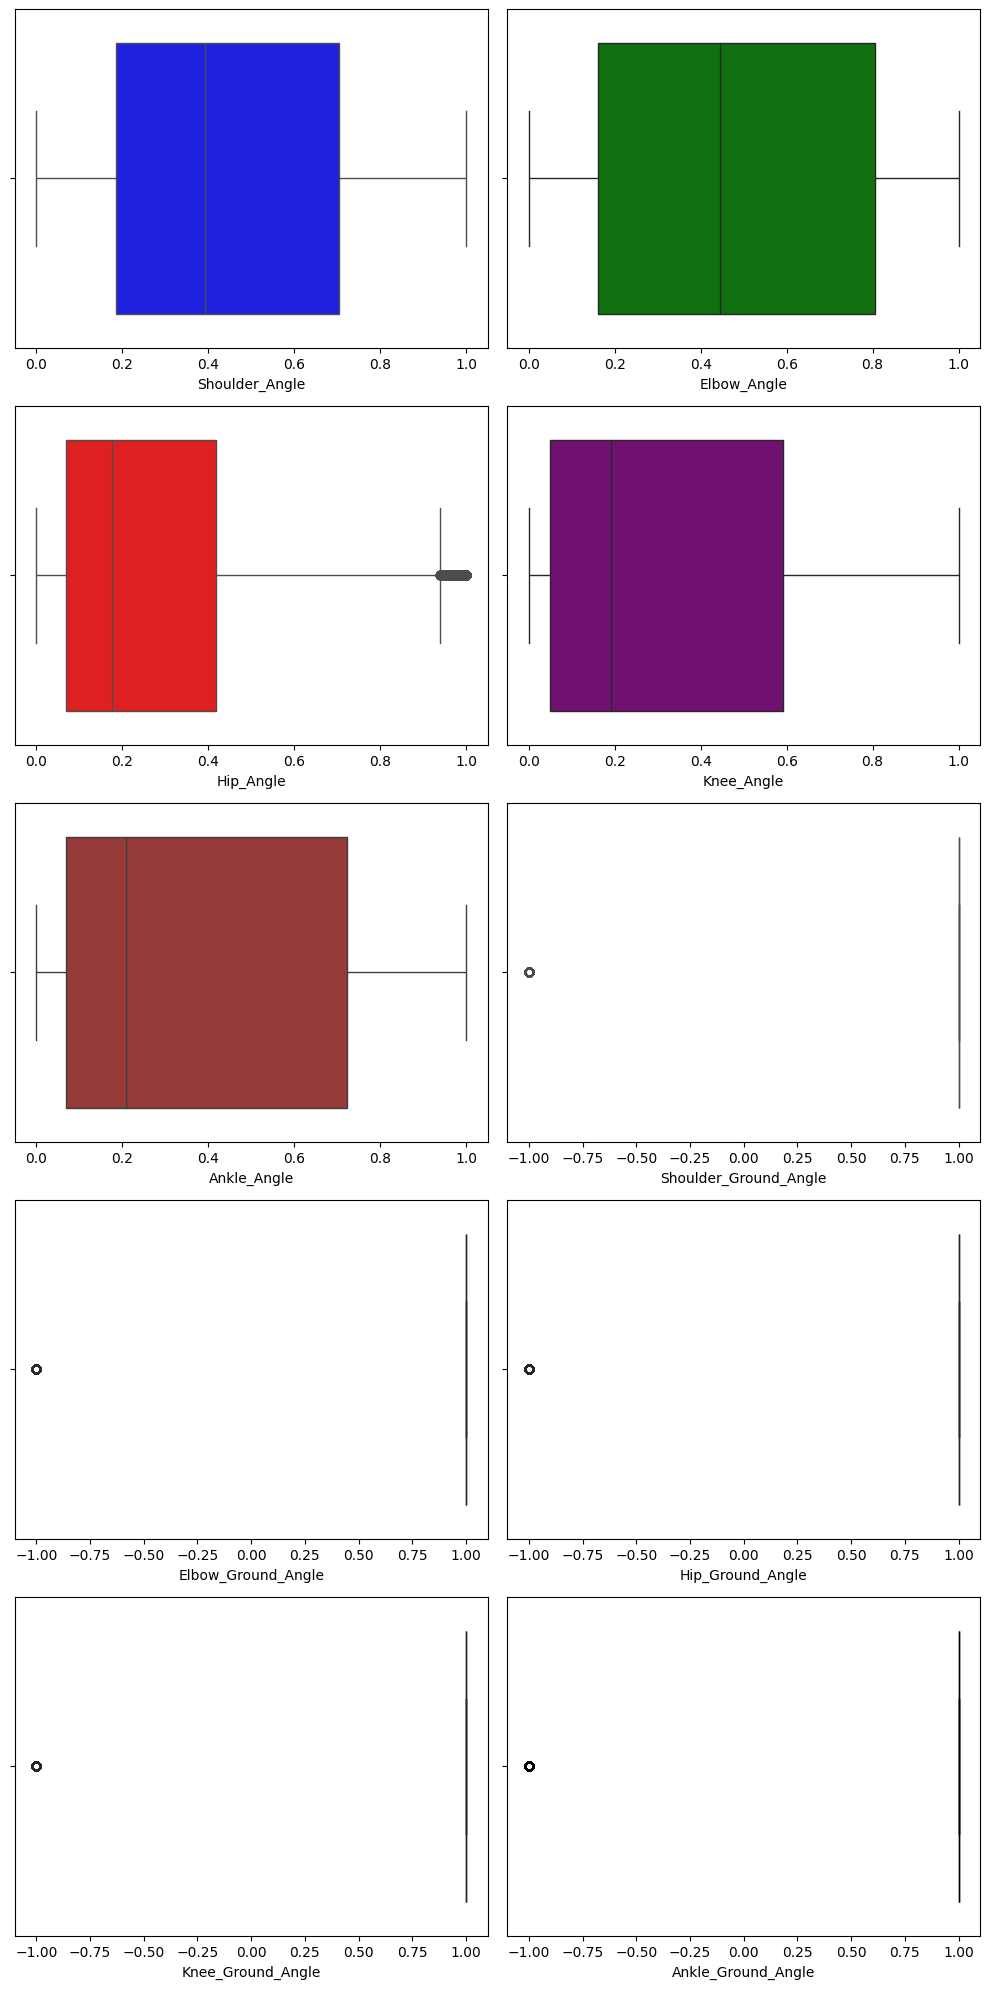

In [34]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
ax = ax.flatten()
for i in range(len(norm_df.columns[:-1])):
  sns.boxplot(x = norm_df.iloc[:, i], ax = ax[i], color=colors[i % len(colors)])

plt.tight_layout()
plt.show()

* The original data has significant spikes (outliers) near certain angle values (like around 90 degrees). Post-transformation, some of these outliers are still present, especially in the ground angle features, but the effect seems reduced for most features.
